## Завдання 2.
Використовуючи датасет з файлу **communities.csv**, виконайте нормалізацію даних. Визначте найкращий метод нормалізації для даного набору даних. 


In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import genfromtxt

##### Імпорт та підготовка даних

In [119]:
data = pd.read_csv('communities.csv', header=None)

numeric_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
X = data[numeric_cols].copy()
y = data[127]
X.drop(labels=[127], axis =1, inplace=True)
X.head()

,0,4,5,6,7,8,9,10,11,12,...,95,96,97,98,99,100,118,119,120,125
0,8,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
1,53,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
3,34,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
4,42,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


##### Візуалізація цілосності даних

<AxesSubplot:>

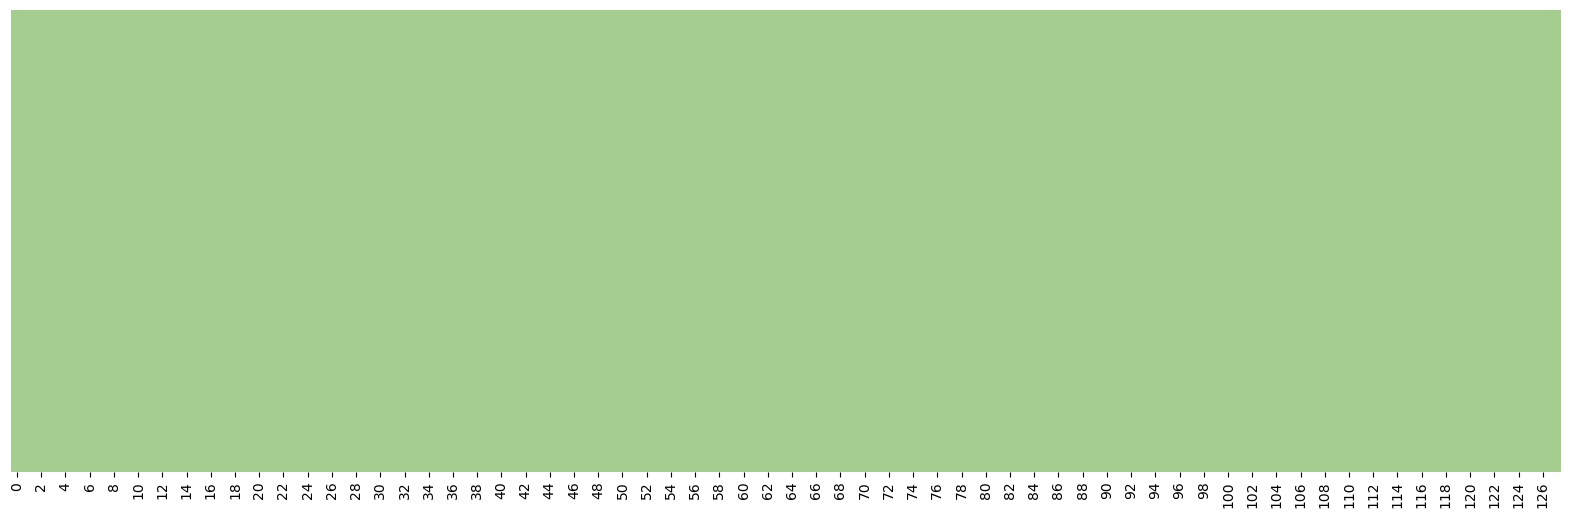

In [120]:
plt.figure(figsize=(20, 6))
sb.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='crest')

##### Розбивка даних на тренувальний та тестовий набори

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(f"Кількість елементів у категоріях для навчального датасету {np.bincount(y_train)}")
print(f"Кількість елементів у категоріях для тестового датасету {np.bincount(y_test)}")

Кількість елементів у категоріях для навчального датасету [1360   35]
Кількість елементів у категоріях для тестового датасету [590   9]


##### Лінійна регресійнна модель

In [122]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = lr.predict(X_test)

##### Показники якості моделі

In [124]:
rmse = np.sqrt(np.mean(np.square(y_test-y_pred)))
mae = np.mean(abs(y_test-y_pred))
print(f'Mean absolute error: {mae:.2f}')
print(f'Root mean squred error: {rmse:.2f}')

Mean absolute error: 0.10
Root mean squred error: 0.13


In [125]:
print(f"Score data set {lr.score(X, y):.4f}")
print(f"Score for train set {lr.score(X_train, y_train):.4f}")
print(f"Score for test set {lr.score(X_test, y_test):.4f}")

Score data set 0.6856
Score for train set 0.7046
Score for test set 0.6305


##### L1 регулярізація

In [132]:
lasso = Lasso(alpha=0.00005).fit(X_train, y_train)
print(f"Score data set {lasso.score(X, y):.4f}")
print(f"Score for train set {lasso.score(X_train, y_train):.4f}")
print(f"Score for test set {lasso.score(X_test, y_test):.4f}")

Score data set 0.6830
Score for train set 0.7013
Score for test set 0.6298


##### L2 регулярізація

In [130]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=2).fit(X_train, y_train)
print(f"Score data set {ridge.score(X, y):.4f}")
print(f"Score for train set {ridge.score(X_train, y_train):.4f}")
print(f"Score for test set {ridge.score(X_test, y_test):.4f}")

Score data set 0.6803
Score for train set 0.6962
Score for test set 0.6337


##### L1 + L2 регуляризація

In [128]:
from sklearn.linear_model import ElasticNet
eklastic = ElasticNet(alpha=0.0001, l1_ratio=0.95).fit(X_train, y_train)
print(f"Score data set {eklastic.score(X, y):.4f}")
print(f"Score for train set {eklastic.score(X_train, y_train):.4f}")
print(f"Score for test set {eklastic.score(X_test, y_test):.4f}")

Score data set 0.6797
Score for train set 0.6970
Score for test set 0.6292
